In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


url = "heart.csv"
df = pd.read_csv(url)

print(" Dataset Loaded Successfully!")
print("Shape of Dataset:", df.shape)
df.head()


 Dataset Loaded Successfully!
Shape of Dataset: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal 

/tmp/ipython-input-115328768.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


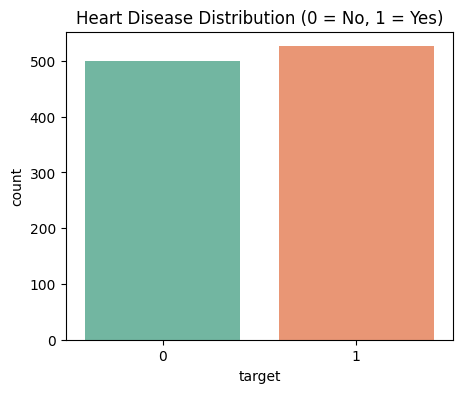

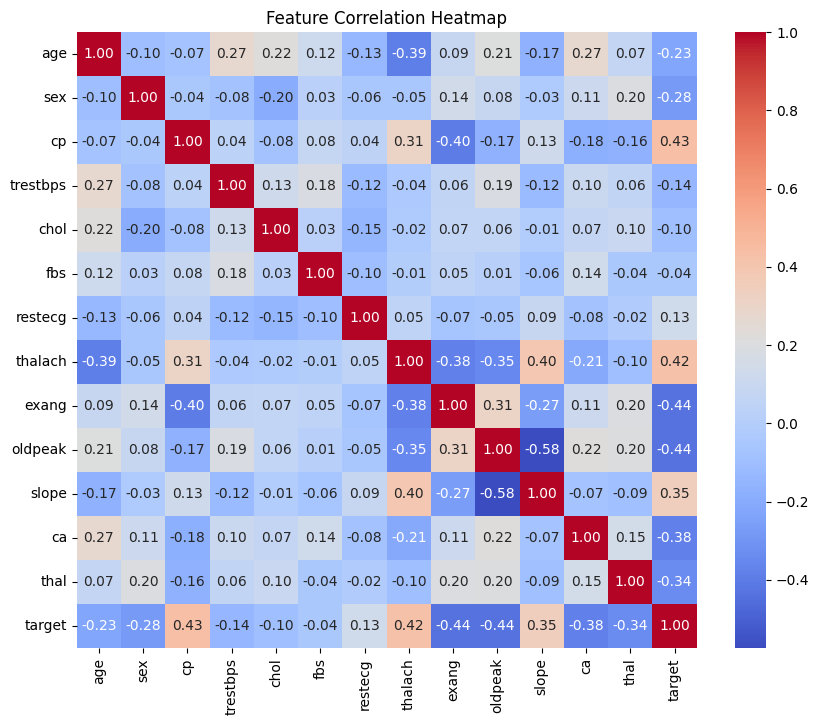

In [ ]:
# Check basic info
print("\nDataset Info:")
df.info()

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Plot target distribution
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Encode categorical columns if any
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Split data
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



 Random Forest Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



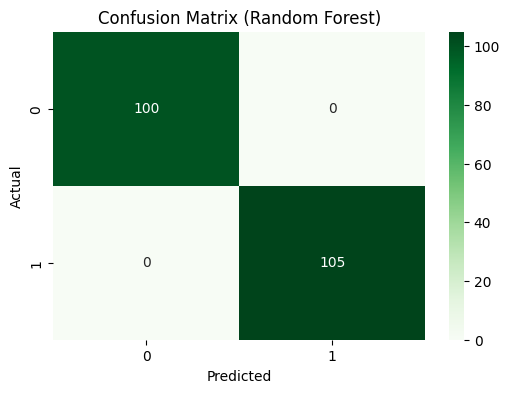

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print("\n Random Forest Accuracy:", round(acc*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens', fmt='d')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



 Tuning Hyperparameters (takes ~1 min)...
Fitting 5 folds for each of 90 candidates, totalling 450 fits

 Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
 Tuned Random Forest Accuracy: 100.0 %


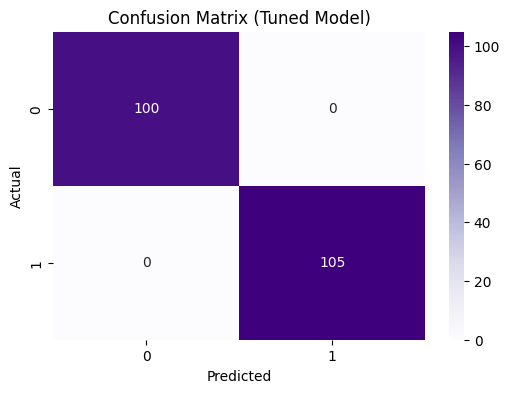

In [ ]:
# Tune parameters for better accuracy
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
}

print("\n Tuning Hyperparameters (takes ~1 min)...")
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)

best_acc = accuracy_score(y_test, best_pred)
print("\n Best Parameters:", grid_search.best_params_)
print(" Tuned Random Forest Accuracy:", round(best_acc*100, 2), "%")

# Confusion Matrix for Tuned Model
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, best_pred), annot=True, cmap='Purples', fmt='d')
plt.title("Confusion Matrix (Tuned Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# 💬 Step 12: Interactive User Prediction Function
def predict_heart_disease():
    print("\nEnter the following details:")
    age = float(input("Age: "))
    sex = int(input("Sex (1=Male, 0=Female): "))
    cp = int(input("Chest Pain Type (0–3): "))
    trestbps = float(input("Resting Blood Pressure: "))
    chol = float(input("Cholesterol: "))
    fbs = int(input("Fasting Blood Sugar > 120 (1=True, 0=False): "))
    restecg = int(input("Resting ECG (0–2): "))
    thalach = float(input("Max Heart Rate: "))
    exang = int(input("Exercise Angina (1=Yes, 0=No): "))
    oldpeak = float(input("ST Depression: "))
    slope = int(input("Slope (0–2): "))
    ca = int(input("Major Vessels (0–3): "))
    thal = int(input("Thal (1=Normal, 2=Fixed, 3=Reversible): "))

    # Create input array
    features = np.array([[age, sex, cp, trestbps, chol, fbs, restecg,
                          thalach, exang, oldpeak, slope, ca, thal]])

    # Scale using the same scaler used during training
    features = scaler.transform(features)

    # Predict using the optimized Random Forest model
    result = best_model.predict(features)

    if result[0] == 1:
        print("\n🩺 Result: Patient has **Heart Disease** 💔")
    else:
        print("\n💖 Result: Patient has **No Heart Disease** ✅")

In [ ]:
predict_heart_disease()
0


Enter the following details:
